In [1]:
import combnet
import pandas as pd
from json import load

In [2]:
pattern = 'chords-conv-*/overall.json'
dataset = 'aggregate'
df = pd.DataFrame(columns=['run', 'accuracy', 'n_params'])
for file in combnet.EVAL_DIR.glob(pattern):
    name = file.parent.name
    with open(file, 'r') as f:
        results = load(f)
        n_params = results['meta']['n_params']
        results = results[dataset]
    df.loc[len(df)] = [name, results['accuracy'], n_params]
df = df.sort_values('accuracy', ascending=False).head(20)
df

,run,accuracy,n_params
1,chords-conv-0_001-192-48,1.00,11812
5,chords-conv-0_005-256-48,1.00,14884
8,chords-conv-0_005-192-48,1.00,11812
9,chords-conv-0_005-256-8,1.00,2164
40,chords-conv-0_005-256-16,1.00,4452
23,chords-conv-0_005-256-32,1.00,9412
55,chords-conv-0_001-256-48,1.00,14884
56,chords-conv-0_01-256-32,1.00,9412
59,chords-conv-0_01-256-16,1.00,4452
76,chords-conv-0_001-192-16,1.00,3428


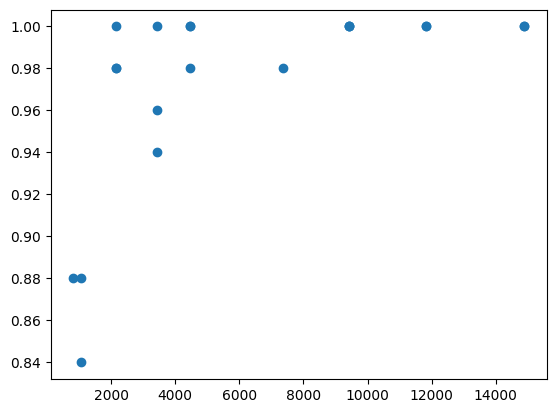

In [3]:
from matplotlib import pyplot as plt
plt.scatter(df['n_params'], df['accuracy'])
plt.show()